# **Visualização de dados**

A proposta desse notebook é praticar visualização de dados/ tratamento de dados com python aliado ao conhecimento e experiência ao longo da minha jornada em SQL e dataviz em outras ferramentas como PowerBI.

# **Descrição do dataset**

Nome do conjunto de dados: **Produtos e prestadores hospitalar**

Tipo de licença: **Creative Common Attribution**

Link: [https://dados.gov.br/dataset/produtos-e-prestadores-hospitalares](https://dados.gov.br/dataset/produtos-e-prestadores-hospitalares)

Este é um dataset público e pode ser encontrado no Portal Brasileiro de Dados Abertos. Além do próprio dataset, você vai encontrar uma breve descrição sobre os dados e um dicionário.

Este conjunto de dados fornece informações sobre características da operadora de saúde, plano e estabelecimentos de saúde. Nele é possível encontrar planos com cobertura médico hospitalar (exceto plano exclusivamente odontológicos), ativos/suspensos (exceto planos cancelados ou transferidos), **de operadoras com registro ativo**.

In [20]:
#Libs
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore")

In [11]:
#Import data
dfba = pd.read_csv('C:/Users/dssodre/Downloads/produtos_e_prestadores_hospitalares/produtos_prestadores_hospitalares_BA.csv', delimiter=';')
dfba.head()

,#ID_REDE,CD_OPERADORA,NO_RAZAO,DS_CLASSIFICACAO,DE_PORTE,ID_PLANO,CD_PLANO,TP_VIGENCIA_PLANO,CONTRATACAO,DE_TIPO_CONTRATACAO,...,DE_TIPO_PRESTADOR,DE_TIPO_CONTRATO,DE_DISPONIBILIDADE,CD_MUNICIPIO,NM_MUNICIPIO_X,SG_UF,DT_VINCULO_INICIO,DT_VINCULO_FIM,NM_REGIAO,DT_ATUALIZACAO
0,1506006 10516322,477,SUL AMERICA SEGURADORA DE SAUDE S.A.,Seguradora,SEM BENEFICIARIOS,1506006,000300/022820,A,INDIVIDUAL,INDIVIDUAL OU FAMILIAR,...,Contratualizado,Direto,Parcial,292860,SANTO AMARO,BA,1999-10-26,2022-11-11,NORDESTE,2022-09-24
1,1506096 55645781,477,SUL AMERICA SEGURADORA DE SAUDE S.A.,Seguradora,SEM BENEFICIARIOS,1506096,000900/000012,A,INDIVIDUAL,INDIVIDUAL OU FAMILIAR,...,Contratualizado,Direto,Parcial,292860,SANTO AMARO,BA,1999-12-03,2009-09-04,NORDESTE,2022-09-24
2,1335964 141832419,477,SUL AMERICA SEGURADORA DE SAUDE S.A.,Seguradora,SEM BENEFICIARIOS,1335964,401388983,P,INDIVIDUAL,INDIVIDUAL OU FAMILIAR,...,Contratualizado,Direto,Parcial,292860,SANTO AMARO,BA,2009-06-30,NaN,NORDESTE,2022-09-24
3,1335962 10516322,477,SUL AMERICA SEGURADORA DE SAUDE S.A.,Seguradora,SEM BENEFICIARIOS,1335962,401389981,P,INDIVIDUAL,INDIVIDUAL OU FAMILIAR,...,Contratualizado,Direto,Parcial,292860,SANTO AMARO,BA,2009-06-30,2022-11-11,NORDESTE,2022-09-24
4,1505991 10516322,477,SUL AMERICA SEGURADORA DE SAUDE S.A.,Seguradora,SEM BENEFICIARIOS,1505991,000300/012165,A,INDIVIDUAL,INDIVIDUAL OU FAMILIAR,...,Contratualizado,Direto,Parcial,292860,SANTO AMARO,BA,1999-10-26,2022-11-11,NORDESTE,2022-09-24


In [12]:
# Função para realizar uma análise inicial do conjunto de dados:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)
    print('TIPO DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-' * 50)
    print('VALORES UNICOS POR FEATURE', '\n')
    print(data.nunique())
    print('\n', '-' * 50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum())

show_info(dfba)

DATASET SHAPE:  (1364605, 32) 

--------------------------------------------------
TIPO DE DADOS POR FEATURE:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364605 entries, 0 to 1364604
Data columns (total 32 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   #ID_REDE                        1364605 non-null  object 
 1   CD_OPERADORA                    1364605 non-null  int64  
 2   NO_RAZAO                        1364605 non-null  object 
 3   DS_CLASSIFICACAO                1364605 non-null  object 
 4   DE_PORTE                        1364605 non-null  object 
 5   ID_PLANO                        1364605 non-null  int64  
 6   CD_PLANO                        1364605 non-null  object 
 7   TP_VIGENCIA_PLANO               1364605 non-null  object 
 8   CONTRATACAO                     1364605 non-null  object 
 9   DE_TIPO_CONTRATACAO             1364605 non-null  object 
 10  DE_TIPO_MODALIDADE_FINM         776421 non-null   object 
 11  SEGMENTACAO_ASSISTENCIAL        1364605 non-null  object 
 12  

#ID_REDE                          1362946
CD_OPERADORA                          335
NO_RAZAO                              335
DS_CLASSIFICACAO                        5
DE_PORTE                                1
ID_PLANO                            18870
CD_PLANO                            17567
TP_VIGENCIA_PLANO                       2
CONTRATACAO                             2
DE_TIPO_CONTRATACAO                     3
DE_TIPO_MODALIDADE_FINM                 2
SEGMENTACAO_ASSISTENCIAL                5
DE_TIPO_ABRANGENCIA_GEOGRAFICA          5
LG_FATOR_MODERADOR                      2
DE_SITUACAO_PRINCIPAL                   2
CD_SITUACAO_PLANO                      12
ID_ESTABELECIMENTO_SAUDE            39443
CD_CNPJ_ESTB_SAUDE                   2009
CD_CNES                              1645
NM_ESTABELECIMENTO_SAUDE             4654
DE_CLAS_ESTB_SAUDE                      3
LG_URGENCIA_EMERGENCIA                  2
DE_TIPO_PRESTADOR                       2
DE_TIPO_CONTRATO                  

#ID_REDE                                0
CD_OPERADORA                            0
NO_RAZAO                                0
DS_CLASSIFICACAO                        0
DE_PORTE                                0
ID_PLANO                                0
CD_PLANO                                0
TP_VIGENCIA_PLANO                       0
CONTRATACAO                             0
DE_TIPO_CONTRATACAO                     0
DE_TIPO_MODALIDADE_FINM            588184
SEGMENTACAO_ASSISTENCIAL                0
DE_TIPO_ABRANGENCIA_GEOGRAFICA          0
LG_FATOR_MODERADOR                      0
DE_SITUACAO_PRINCIPAL                   0
CD_SITUACAO_PLANO                       0
ID_ESTABELECIMENTO_SAUDE                0
CD_CNPJ_ESTB_SAUDE                      0
CD_CNES                            141834
NM_ESTABELECIMENTO_SAUDE                0
DE_CLAS_ESTB_SAUDE                      0
LG_URGENCIA_EMERGENCIA                  0
DE_TIPO_PRESTADOR                       0
DE_TIPO_CONTRATO                  

In [13]:
# Armazenando apenas as colunas qualitativas em um DataFrame, para realização da análise.
tipos_nominais = ['object', 'bool']
qualitativas = list(dfba.select_dtypes(include=tipos_nominais).columns)
qualitativas

['#ID_REDE',
 'NO_RAZAO',
 'DS_CLASSIFICACAO',
 'DE_PORTE',
 'CD_PLANO',
 'TP_VIGENCIA_PLANO',
 'CONTRATACAO',
 'DE_TIPO_CONTRATACAO',
 'DE_TIPO_MODALIDADE_FINM',
 'SEGMENTACAO_ASSISTENCIAL',
 'DE_TIPO_ABRANGENCIA_GEOGRAFICA',
 'DE_SITUACAO_PRINCIPAL',
 'NM_ESTABELECIMENTO_SAUDE',
 'DE_CLAS_ESTB_SAUDE',
 'DE_TIPO_PRESTADOR',
 'DE_TIPO_CONTRATO',
 'DE_DISPONIBILIDADE',
 'NM_MUNICIPIO_X',
 'SG_UF',
 'DT_VINCULO_INICIO',
 'DT_VINCULO_FIM',
 'NM_REGIAO',
 'DT_ATUALIZACAO']

In [14]:
df_qualitativo = dfba[qualitativas]

DS_CLASSIFICACAO


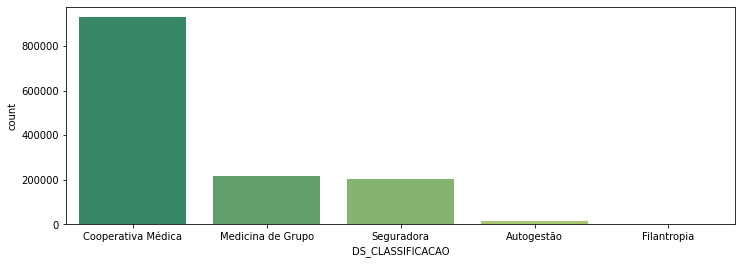

DE_PORTE


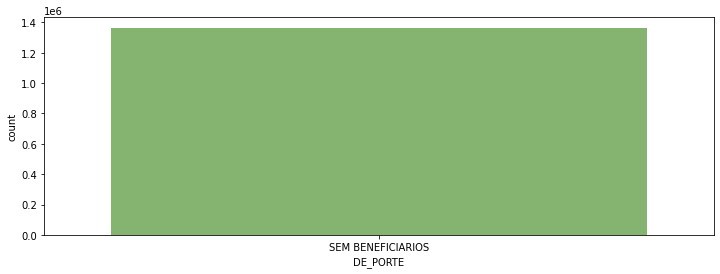

TP_VIGENCIA_PLANO


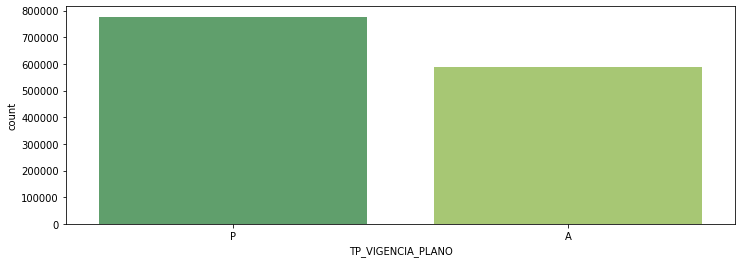

CONTRATACAO


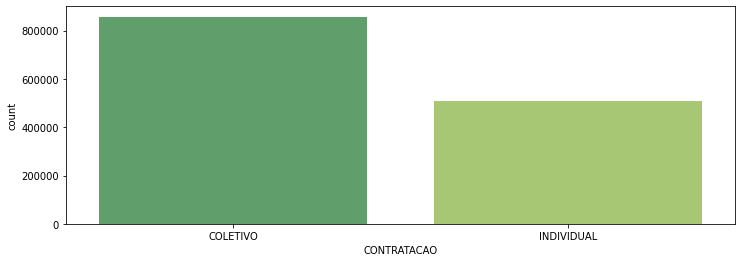

DE_TIPO_CONTRATACAO


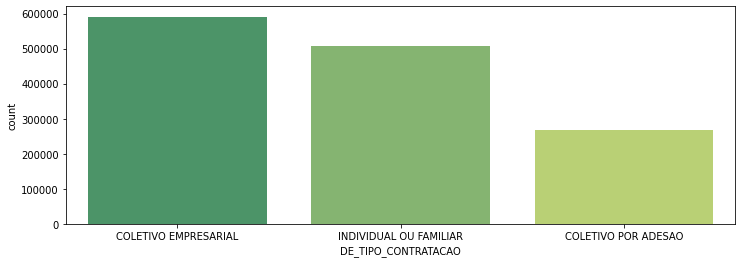

DE_TIPO_MODALIDADE_FINM


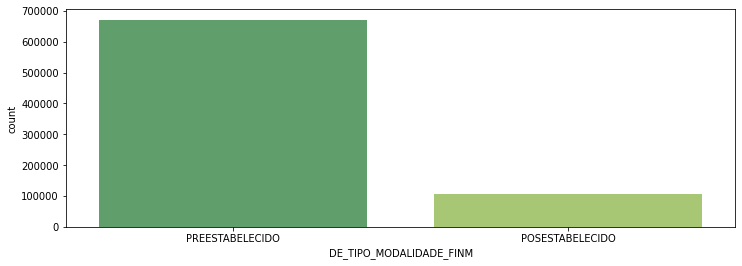

SEGMENTACAO_ASSISTENCIAL


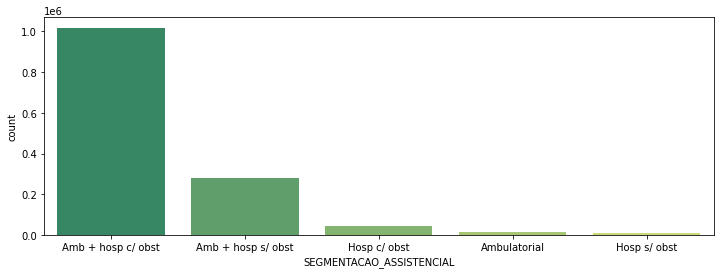

DE_TIPO_ABRANGENCIA_GEOGRAFICA


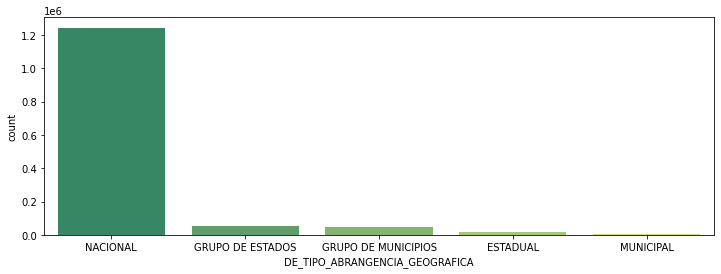

DE_SITUACAO_PRINCIPAL


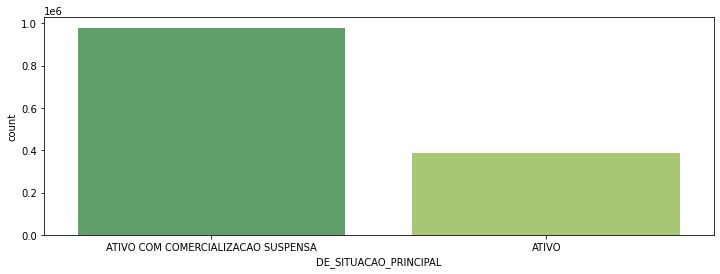

DE_CLAS_ESTB_SAUDE


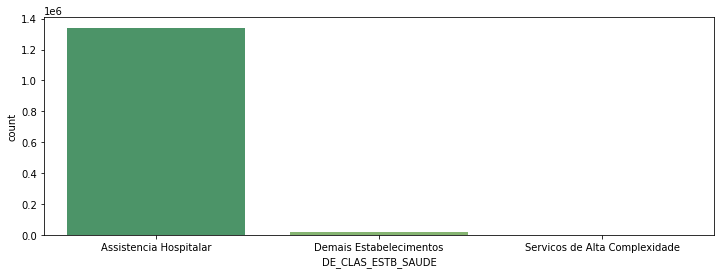

DE_TIPO_PRESTADOR


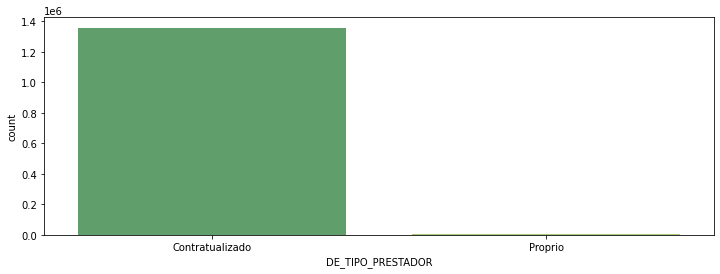

DE_TIPO_CONTRATO


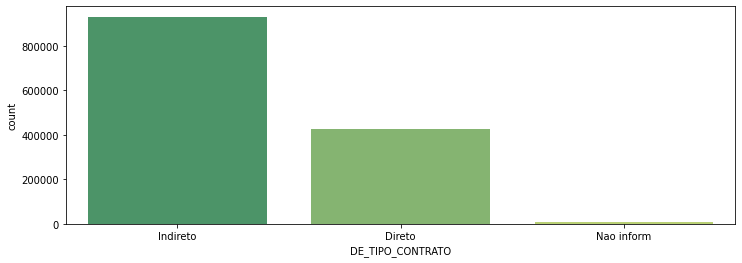

DE_DISPONIBILIDADE


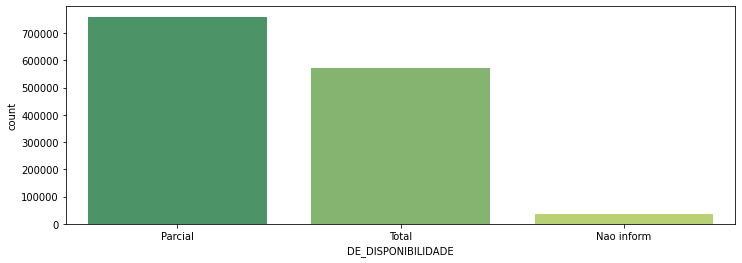

In [124]:
# Plotando gráficos de barras com a contagem de cada variável qualitativa presente no dataframe:
# Retirei algumas variáveis qualitativas com enorme variabilidade, oque tornava inviável a leitura do gráfico.
for tipos_nominais in df_qualitativo:
    if tipos_nominais not in ['#ID_REDE','NO_RAZAO','CD_PLANO','NM_ESTABELECIMENTO_SAUDE','NM_MUNICIPIO_X','DT_VINCULO_INICIO','DT_VINCULO_FIM','DT_ATUALIZACAO','NM_REGIAO','SG_UF']: 
        print(tipos_nominais)
        plt.figure(figsize=(12,4))
        sns.countplot(df_qualitativo[tipos_nominais], palette='summer',order=pd.value_counts(df_qualitativo[tipos_nominais]).index)
        new_patches = []
        plt.show()

In [16]:
#Quantidade de operadoras por classificação
query = """

    SELECT 
        distinct(DS_CLASSIFICACAO) as Tipo,
        COUNT(DISTINCT(NO_RAZAO)) as QtdOperadoras
        
    FROM dfba
    GROUP BY DS_CLASSIFICACAO
    ORDER BY COUNT(1) DESC
    """
df_qtdeoperadora = sqldf(query)
print(df_qtdeoperadora)

                 Tipo  QtdOperadoras
0  Cooperativa Médica            219
1   Medicina de Grupo             62
2          Seguradora              8
3          Autogestão             44
4         Filantropia              2


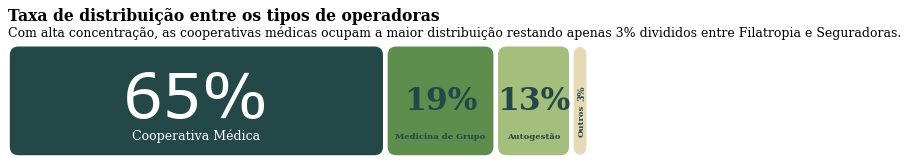

In [118]:
# Taxa de distribuição entre os tipos de operadoras

x=df_qtdeoperadora.groupby(['Tipo'])['QtdOperadoras'].sum()
y=df_qtdeoperadora['QtdOperadoras'].sum()
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
fig, ax = plt.subplots(1,1,figsize=(10, 2), dpi=75)
#1 background da area da Cooperativa Médica
ax.barh(mf_ratio.index, mf_ratio['Cooperativa Médica'], 
        color='#244747', label='Cooperativa Médica')
#2 background da area da Medicina de Grupo
ax.barh(mf_ratio.index, mf_ratio['Medicina de Grupo'], left=mf_ratio['Cooperativa Médica'], 
        color='#5F8D4E', label='Medicina de Grupo')
#3 background da area da Autogestão
ax.barh(mf_ratio.index, mf_ratio['Autogestão'], left=(mf_ratio['Cooperativa Médica']+mf_ratio['Medicina de Grupo']), 
        color='#A4BE7B', label='Autogestão')
#4 background da area da Autogestão
ax.barh(mf_ratio.index, mf_ratio['Seguradora']+mf_ratio['Filantropia'], left=(mf_ratio['Cooperativa Médica']+mf_ratio['Medicina de Grupo']+mf_ratio['Autogestão']), 
        color='#E5D9B6', label='Outros')

#1 background da area da Cooperativa Médica
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Cooperativa Médica'][i]*100)}%", 
                    xy=(mf_ratio['Cooperativa Médica'][i]/2, i),
                    va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='Verdana',
                    color='white')

    ax.annotate("Cooperativa Médica", 
                    xy=(mf_ratio['Cooperativa Médica'][i]/2, -0.25),
                    va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                    color='white')
#2 background da area da Medicina de Grupo
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Medicina de Grupo'][i]*100)}%", 
                    xy=(mf_ratio['Cooperativa Médica'][i]+mf_ratio['Medicina de Grupo'][i]/2, i),
                    va = 'center', ha='center',fontsize=30, fontweight='bold', fontfamily='serif',
                    color='#244747')
    ax.annotate('Medicina de Grupo', 
                    xy=(mf_ratio['Cooperativa Médica'][i]+mf_ratio['Medicina de Grupo'][i]/2, -0.25),
                    va = 'center', ha='center',fontsize=8, fontweight='bold', fontfamily='serif',
                    color='#244747')
#3 background da area da Autogestão
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Autogestão'][i]*100)}%", 
                    xy=(mf_ratio['Cooperativa Médica'][i]+mf_ratio['Medicina de Grupo'][i]+mf_ratio['Autogestão'][i]/2, i),
                    va = 'center', ha='center',fontsize=30, fontweight='bold', fontfamily='serif',
                    color='#244747')
    ax.annotate('Autogestão', 
                    xy=(mf_ratio['Cooperativa Médica'][i]+mf_ratio['Medicina de Grupo'][i]+mf_ratio['Autogestão'][i]/2, -0.25),
                    va = 'center', ha='center',fontsize=8, fontweight='bold', fontfamily='serif',
                    color='#244747')
#4 background da area dos outros
for i in mf_ratio.index:
    ax.annotate(f"{int((mf_ratio['Seguradora'][i]+mf_ratio['Filantropia'][i])*100)}%", 
                    xy=(mf_ratio['Cooperativa Médica'][i]+mf_ratio['Medicina de Grupo'][i]+mf_ratio['Autogestão'][i]+mf_ratio['Seguradora'][i]+mf_ratio['Filantropia'][i]/2, i),
                    va = 'bottom', ha='right',fontsize=9, fontweight='bold', fontfamily='serif', rotation = '90',
                    color='#244747')
    ax.annotate('Outros', 
                    xy=(mf_ratio['Cooperativa Médica'][i]+mf_ratio['Medicina de Grupo'][i]+mf_ratio['Autogestão'][i]+mf_ratio['Seguradora'][i]+mf_ratio['Filantropia'][i]/2, -0.25),
                    va = 'bottom', ha='right',fontsize=8, fontweight='bold', fontfamily='serif', rotation = '90',
                    color='#244747')

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.4,0.4)
    ax.set_xticks([])
    ax.set_yticks([])
# arredondar as bordas    
new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.0040,rounding_size=0.015",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    patch.remove()
    new_patches.append(p_bbox)
for patch in new_patches:
    ax.add_patch(patch)
    
# Título e subtítulo
fig.text(0.125,1.04,'Taxa de distribuição entre os tipos de operadoras', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.93,'Com alta concentração, as cooperativas médicas ocupam a maior distribuição restando apenas 3% divididos entre Filatropia e Seguradoras.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show(ax)

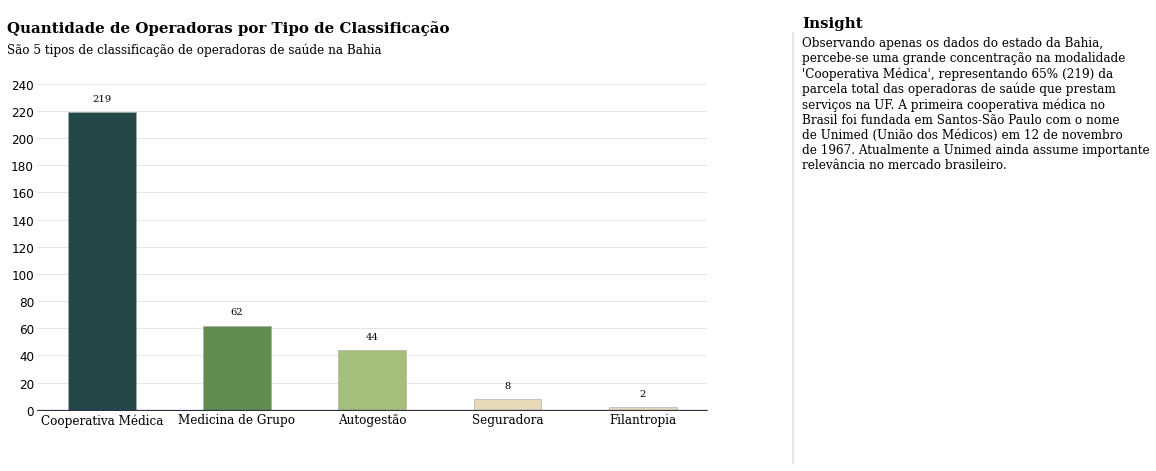

In [128]:
#Plot Quantidade de operadoras por classificação
data = df_qtdeoperadora.groupby('Tipo')['QtdOperadoras'].sum().sort_values(ascending=False)[:10]

# Plot

color_map[0] = '#244747'
color_map[1] = '#5F8D4E'
color_map[2] =  '#A4BE7B'
color_map[3] =  '#E5D9B6'
color_map[4] =  '#E5D9B6'

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


# Rótulos
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), #esta linha altera a altura do rótulo.
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remoção da borda

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Categorias x

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Configurações do título e subtítulo

fig.text(0.09, 1, 'Quantidade de Operadoras por Tipo de Classificação', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'São 5 tipos de classificação de operadoras de saúde na Bahia', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.01, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.01, 0.65, '''

Observando apenas os dados do estado da Bahia,
percebe-se uma grande concentração na modalidade
'Cooperativa Médica', representando 65% (219) da
parcela total das operadoras de saúde que prestam
serviços na UF. A primeira cooperativa médica no 
Brasil foi fundada em Santos-São Paulo com o nome
de Unimed (União dos Médicos) em 12 de novembro
de 1967. Atualmente a Unimed ainda assume importante
relevância no mercado brasileiro. 
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 250, 20) # y min, max, intervalo
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

    
# configurações da linha superior as categorias no eixo x
plt.axhline(y = 0, color = 'blue', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)



plt.show()

In [12]:
#Quantidade de operadoras por classificação
query = """

    SELECT 
        NO_RAZAO,
        COUNT(DISTINCT(ID_PLANO)) as QtdePlanos
        
    FROM dfba

    GROUP BY 
        NO_RAZAO
    ORDER BY COUNT(DISTINCT(ID_PLANO)) DESC
    """
resultado = sqldf(query)
display(resultado)

,NO_RAZAO,QtdePlanos
0,AMIL ASSISTENCIA MEDICA INTERNACIONAL S.A.,1302
1,CENTRAL NACIONAL UNIMED COOPERATIVA CENTRAL,780
2,BRADESCO SAUDE S.A.,769
3,HAPVIDA ASSISTENCIA MEDICA S.A.,584
4,SUL AMERICA COMPANHIA DE SEGURO SAUDE,576
...,...,...
330,CAIXA DE ASSISTENCIA DOS EMPREGADOS DA EMPRES...,1
331,BEMSTAR ASSISTENCIA MEDICA LTDA,1
332,ASSOCIACAO DOS SERVIDORES FISCAIS DO ESTADO DA...,1
333,ASSOCIACAO DOS AUDITORES FISCAIS DO ESTADO DA ...,1
